# Machine Learning Exercise

The task is to train a model in order to predict if a patient has a heart disease or not. 

![](https://www.nicepng.com/png/detail/397-3975460_disease-high-quality-png-heart-disease-cartoon-png.png)

## Task:

1. Conduct a brief EDA to become familiar with the data. 
2. Preprocess the data as far as you need it and...
3. ...train a logistic regression model.

## Import

In [2]:
# import os
# from dotenv import load_dotenv
# from sqlalchemy import create_engine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# source https://github.com/dhaitz/matplotlib-stylesheets
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Load the data

In [6]:
heart = pd.read_csv("data/heart.csv")
heart.head()

,id,age,sex,serum_cholestoral,fasting_blood_sugar,thal,chest_pain_type,heart_attack,resting_blood_pressure,resting_electrocardiographic_results,maximum_heartrate_achieved,exercise_induced_angina,oldpeak,slope_of_the_peak_exercise_st_segment,number_of_major_vessels_colored_by_flourosopy,real_data
0,0,63.0,1.0,233.0,1.0,1.0,3.0,1,145.0,0.0,150.0,0.0,2.3,0.0,0.0,real data
1,1,NaN,1.0,250.0,0.0,2.0,2.0,1,130.0,1.0,187.0,0.0,3.5,0.0,0.0,real data
2,2,41.0,0.0,204.0,0.0,2.0,1.0,1,130.0,0.0,172.0,0.0,1.4,2.0,0.0,real data
3,3,56.0,1.0,236.0,0.0,2.0,1.0,1,120.0,1.0,178.0,0.0,0.8,2.0,0.0,real data
4,166,67.0,1.0,229.0,0.0,3.0,0.0,0,120.0,0.0,129.0,1.0,2.6,1.0,2.0,real data


We don't need the id and real_data column anymore. So we drop them.

In [7]:
heart.drop(columns=["id", "real_data"], inplace=True)

Reorder the columns.

In [8]:
change_order = ['heart_attack',
 'age',
 'sex',
 'serum_cholestoral',
 'fasting_blood_sugar',
 'thal',
 'chest_pain_type',
 'resting_blood_pressure',
 'resting_electrocardiographic_results',
 'maximum_heartrate_achieved',
 'exercise_induced_angina',
 'oldpeak',
 'slope_of_the_peak_exercise_st_segment',
 'number_of_major_vessels_colored_by_flourosopy']

heart = heart.reindex(columns=change_order)
heart

,heart_attack,age,sex,serum_cholestoral,fasting_blood_sugar,thal,chest_pain_type,resting_blood_pressure,resting_electrocardiographic_results,maximum_heartrate_achieved,exercise_induced_angina,oldpeak,slope_of_the_peak_exercise_st_segment,number_of_major_vessels_colored_by_flourosopy
0,1,63.0,1.0,233.0,1.0,1.0,3.0,145.0,0.0,150.0,0.0,2.3,0.0,0.0
1,1,NaN,1.0,250.0,0.0,2.0,2.0,130.0,1.0,187.0,0.0,3.5,0.0,0.0
2,1,41.0,0.0,204.0,0.0,2.0,1.0,130.0,0.0,172.0,0.0,1.4,2.0,0.0
3,1,56.0,1.0,236.0,0.0,2.0,1.0,120.0,1.0,178.0,0.0,0.8,2.0,0.0
4,0,67.0,1.0,229.0,0.0,3.0,0.0,120.0,0.0,129.0,1.0,2.6,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,1,50.0,0.0,254.0,0.0,2.0,0.0,110.0,0.0,159.0,0.0,0.0,2.0,0.0
349,0,56.0,1.0,283.0,1.0,3.0,0.0,130.0,0.0,103.0,1.0,1.6,0.0,0.0
350,0,65.0,1.0,248.0,0.0,1.0,0.0,110.0,0.0,158.0,0.0,0.6,2.0,2.0
351,1,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Overview

| column | additional information |
|--------|------------------------|
| age | age of patient |
| sex | gender of patient |
| chest_pain_type  | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic | 
| resting_blood_pressure |  | 
| fasting_blood_sugar | > 120 mg/dl, 1 = true, 0 = false | 
| thal | 0 = normal, 1 = fixed defect, 2 = reversable defect
| serum_cholestoral | in mg/dl | 
| resting_electrocardiographic_results | 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria | 
| maximum_heartrate_achieved | | 
| exercise_induced_angina | 1 = yes, 0 = no | 
| oldpeak | ST depression induced by exercise relative to rest | 
| slope_of_the_peak_exercise_st_segment | 1= upsloping, 2 = flat, 3 = downsloping | 
| number_of_major_vessels_colored_by_flourosopy | |
| real_data | tag to distinguish between real and made up data | 
| heart_attack | 0 = little risk of heart attack, 1 = high risk of heart attack | 

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   heart_attack                                   353 non-null    int64  
 1   age                                            343 non-null    float64
 2   sex                                            334 non-null    float64
 3   serum_cholestoral                              303 non-null    float64
 4   fasting_blood_sugar                            303 non-null    float64
 5   thal                                           303 non-null    float64
 6   chest_pain_type                                303 non-null    float64
 7   resting_blood_pressure                         303 non-null    float64
 8   resting_electrocardiographic_results           303 non-null    float64
 9   maximum_heartrate_achieved                     292 non

In [10]:
heart.describe()

,heart_attack,age,sex,serum_cholestoral,fasting_blood_sugar,thal,chest_pain_type,resting_blood_pressure,resting_electrocardiographic_results,maximum_heartrate_achieved,exercise_induced_angina,oldpeak,slope_of_the_peak_exercise_st_segment,number_of_major_vessels_colored_by_flourosopy
count,353.000000,343.000000,334.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,292.000000,303.000000,303.000000,303.000000,303.000000
mean,0.535411,54.807580,0.682635,246.264026,0.148515,2.313531,0.966997,131.623762,0.528053,149.726027,0.326733,1.039604,1.399340,0.729373
std,0.499452,12.484528,0.466149,51.830751,0.356198,0.612277,1.032052,17.538143,0.525860,23.177493,0.469794,1.161075,0.616226,1.022606
min,0.000000,20.000000,0.000000,126.000000,0.000000,0.000000,0.000000,94.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,46.000000,0.000000,211.000000,0.000000,2.000000,0.000000,120.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,55.000000,1.000000,240.000000,0.000000,2.000000,1.000000,130.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000
75%,1.000000,62.000000,1.000000,274.500000,0.000000,3.000000,2.000000,140.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000
max,1.000000,98.000000,1.000000,564.000000,1.000000,3.000000,3.000000,200.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000


> We have a lot of categorical features. But there are already encoded as numbers.  
> The numerical features don't have outliers.

In [11]:
# shape of data
heart.shape

(353, 14)

In [12]:
heart.sex.value_counts()

sex
1.0    228
0.0    106
Name: count, dtype: int64

# EDA

## Missing values

In [13]:
# Missing values
m_values = pd.DataFrame(heart.isnull().sum().sort_values(ascending=False), columns=["missing values"])
m_values[["ratio of missing values"]] = m_values[["missing values"]] / heart.shape[0]


In [14]:
type_list = []
for col in m_values.index.to_list():
    if heart.describe().loc["max", col] < 6:
        type_list.append("categorical")
    else:
        type_list.append("numerical")

In [15]:
m_values["feature type"] = type_list

In [16]:
unique_list = []
for col in m_values.index.to_list():
    n = heart.nunique()[col]
    unique_list.append(n)

m_values["unique values"] = unique_list

In [17]:
m_values

,missing values,ratio of missing values,feature type,unique values
maximum_heartrate_achieved,61,0.172805,numerical,91
serum_cholestoral,50,0.141643,numerical,152
fasting_blood_sugar,50,0.141643,categorical,2
thal,50,0.141643,categorical,4
chest_pain_type,50,0.141643,categorical,4
resting_blood_pressure,50,0.141643,numerical,49
resting_electrocardiographic_results,50,0.141643,categorical,3
exercise_induced_angina,50,0.141643,categorical,2
oldpeak,50,0.141643,numerical,40
slope_of_the_peak_exercise_st_segment,50,0.141643,categorical,3


In [18]:
numerical_features = m_values[m_values["feature type"] == "numerical"].index.to_list()
numerical_features

['maximum_heartrate_achieved',
 'serum_cholestoral',
 'resting_blood_pressure',
 'oldpeak',
 'age']

In [19]:
categorical_features = m_values[m_values["feature type"] == "categorical"].index.to_list()
categorical_features.remove("heart_attack")

In [20]:
categorical_features

['fasting_blood_sugar',
 'thal',
 'chest_pain_type',
 'resting_electrocardiographic_results',
 'exercise_induced_angina',
 'slope_of_the_peak_exercise_st_segment',
 'number_of_major_vessels_colored_by_flourosopy',
 'sex']

<Axes: >

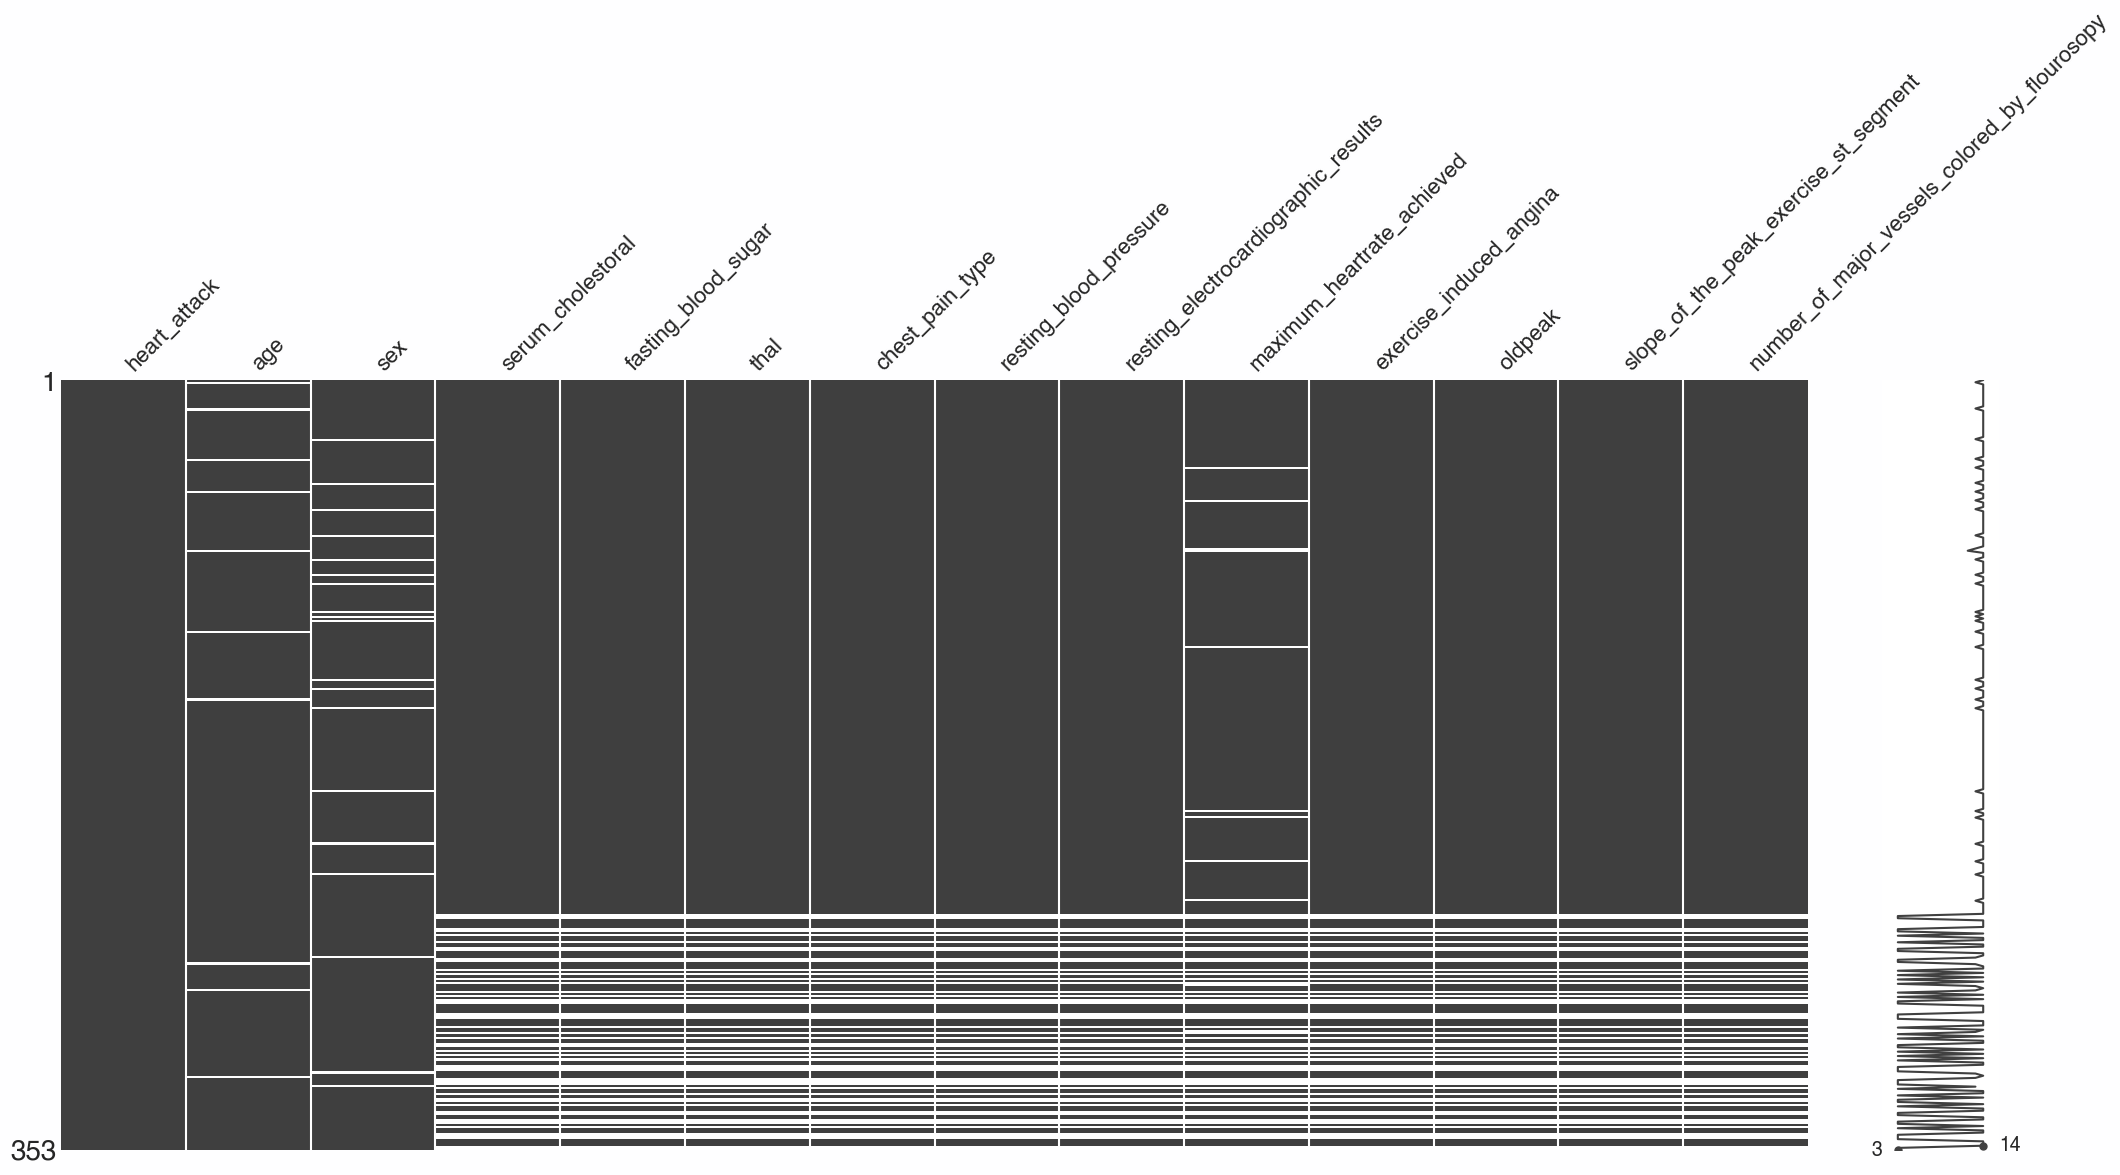

In [21]:
msno.matrix(heart)

What should we do with the missing values?  
Because the missing values for most of the columns seem to appear at the same observations, we try to just drop all the rows.

In [22]:
heart_2 = heart.copy()
heart_2.dropna(inplace=True)
print("We lost", round(-1*(heart_2.shape[0] - heart.shape[0])/heart.shape[0]*100,2), "percent of our data")
print("Data points left: ", round(heart_2.shape[0],2))

We lost 25.21 percent of our data
Data points left:  264


> Maybe not the best choice to drop all the rows.

#### Fill missing values for age and sex

In [23]:
# working with a copy
heart_1 = heart.copy()

In [24]:
heart[["age", "sex"]].describe()

,age,sex
count,343.000000,334.000000
mean,54.807580,0.682635
std,12.484528,0.466149
min,20.000000,0.000000
25%,46.000000,0.000000
50%,55.000000,1.000000
75%,62.000000,1.000000
max,98.000000,1.000000


In [25]:
heart[["age", "sex"]].groupby("sex").mean()

,age
sex,
0.0,55.932692
1.0,53.900000


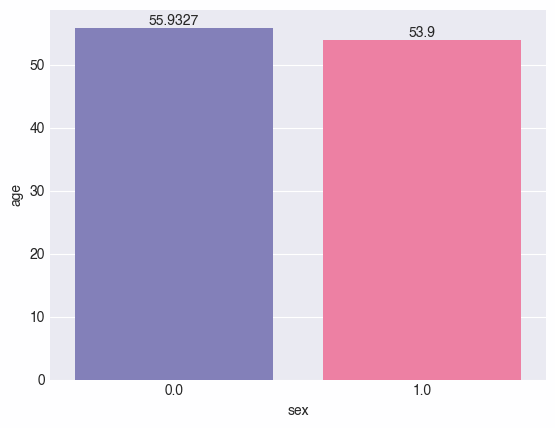

In [26]:
ax = sns.barplot(data=heart, x = "sex" , y="age", estimator="mean", errorbar=None)

for i in ax.containers:
    ax.bar_label(i,)

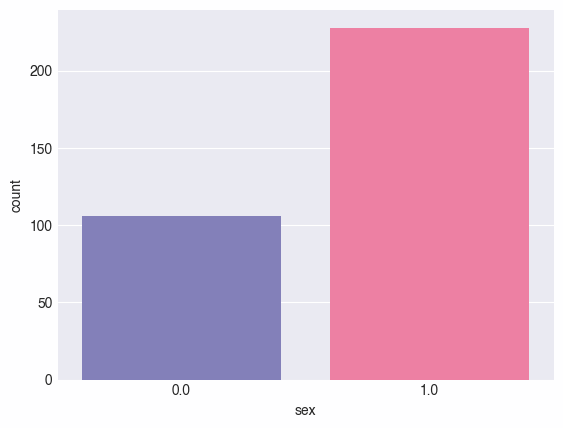

In [27]:
ax = sns.countplot(data=heart, x = "sex" )

In [28]:
# Filling age with median of age

heart_1.fillna({'age': 55}, inplace=True)

In [29]:
# Sort the data by age
heart_1.sort_values(by=["age","sex"], inplace=True)

In [30]:
# Filling the sex with row before
heart_1[["sex"]] = heart_1[["sex"]].fillna(method="bfill")

In [31]:
# look how many Null values we still have
heart_1.isnull().sum()

heart_attack                                      0
age                                               0
sex                                               0
serum_cholestoral                                50
fasting_blood_sugar                              50
thal                                             50
chest_pain_type                                  50
resting_blood_pressure                           50
resting_electrocardiographic_results             50
maximum_heartrate_achieved                       61
exercise_induced_angina                          50
oldpeak                                          50
slope_of_the_peak_exercise_st_segment            50
number_of_major_vessels_colored_by_flourosopy    50
dtype: int64

In [32]:
# Drop the rest missing values

heart_1.dropna(inplace=True)

In [33]:
heart_1.isnull().sum()

heart_attack                                     0
age                                              0
sex                                              0
serum_cholestoral                                0
fasting_blood_sugar                              0
thal                                             0
chest_pain_type                                  0
resting_blood_pressure                           0
resting_electrocardiographic_results             0
maximum_heartrate_achieved                       0
exercise_induced_angina                          0
oldpeak                                          0
slope_of_the_peak_exercise_st_segment            0
number_of_major_vessels_colored_by_flourosopy    0
dtype: int64

> No missing values left

In [34]:
print("We lost", round(-1*(heart_1.shape[0] - heart.shape[0])/heart.shape[0]*100,2), "percent of our data")
print("Data points left: ", round(heart_1.shape[0],2))

We lost 17.28 percent of our data
Data points left:  292


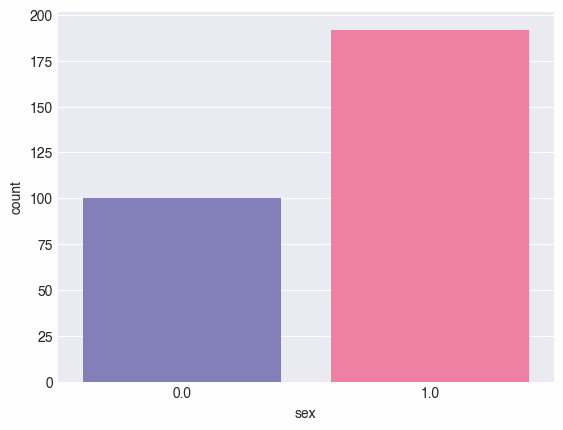

In [35]:
ax = sns.countplot(data=heart_1, x = "sex" )

In [36]:
heart_1[["age", "sex"]].describe()

,age,sex
count,292.000000,292.000000
mean,54.250000,0.657534
std,9.041856,0.475349
min,29.000000,0.000000
25%,47.000000,0.000000
50%,55.000000,1.000000
75%,60.000000,1.000000
max,77.000000,1.000000


## Distribution of the features

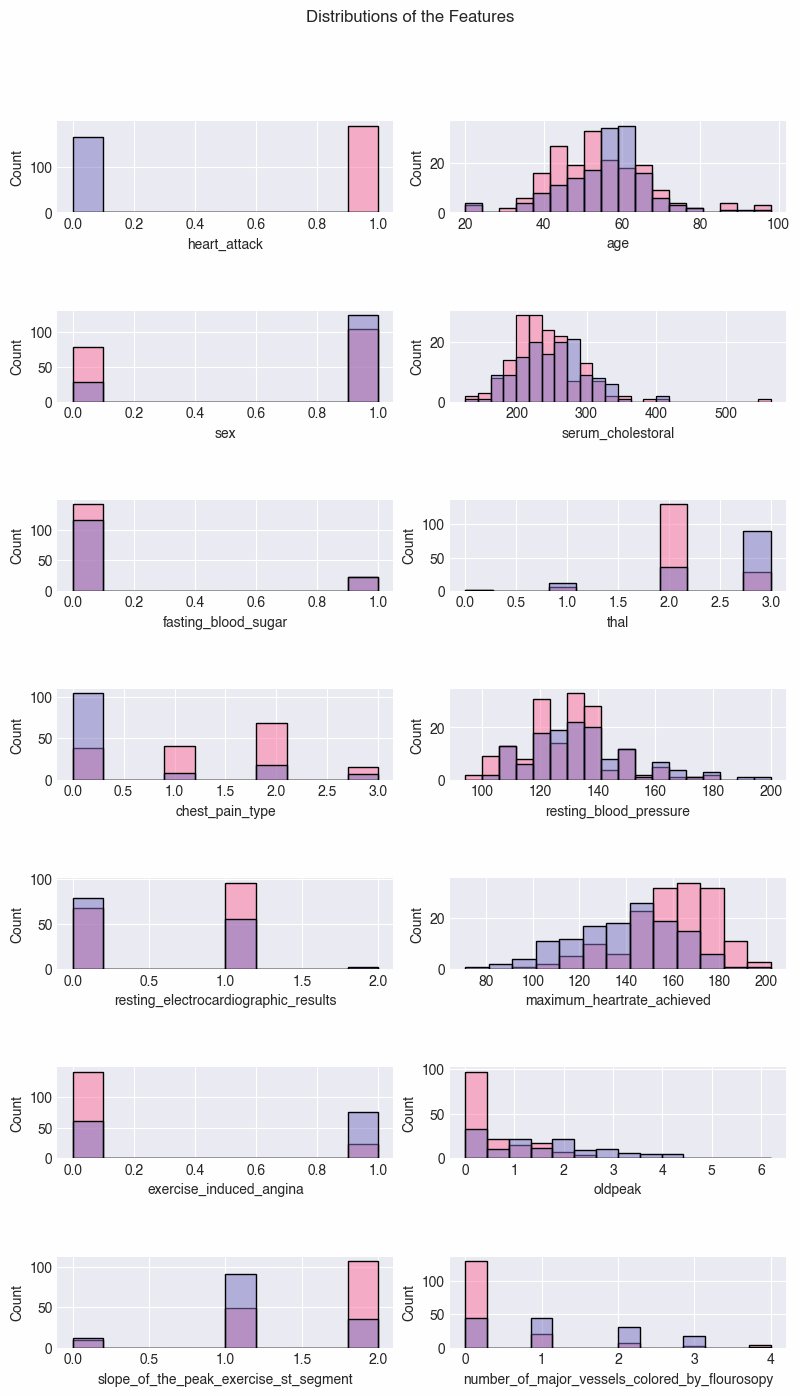

In [37]:
# Plotting all distributions

fig, ax = plt.subplots(7, 2, figsize=(8,14))
fig.tight_layout(h_pad=6)

fig.suptitle('Distributions of the Features')
plt.subplots_adjust(top=0.9)

features = heart.columns.to_list()

for row, i in enumerate(range(0, len(features), 2)):
    sns.histplot(data=heart, x=features[i], ax=ax[row, 0], hue="heart_attack", legend=False)
    sns.histplot(data=heart, x=features[i+1], ax=ax[row, 1], hue="heart_attack", legend=False)

## Feature Relations and Correlations

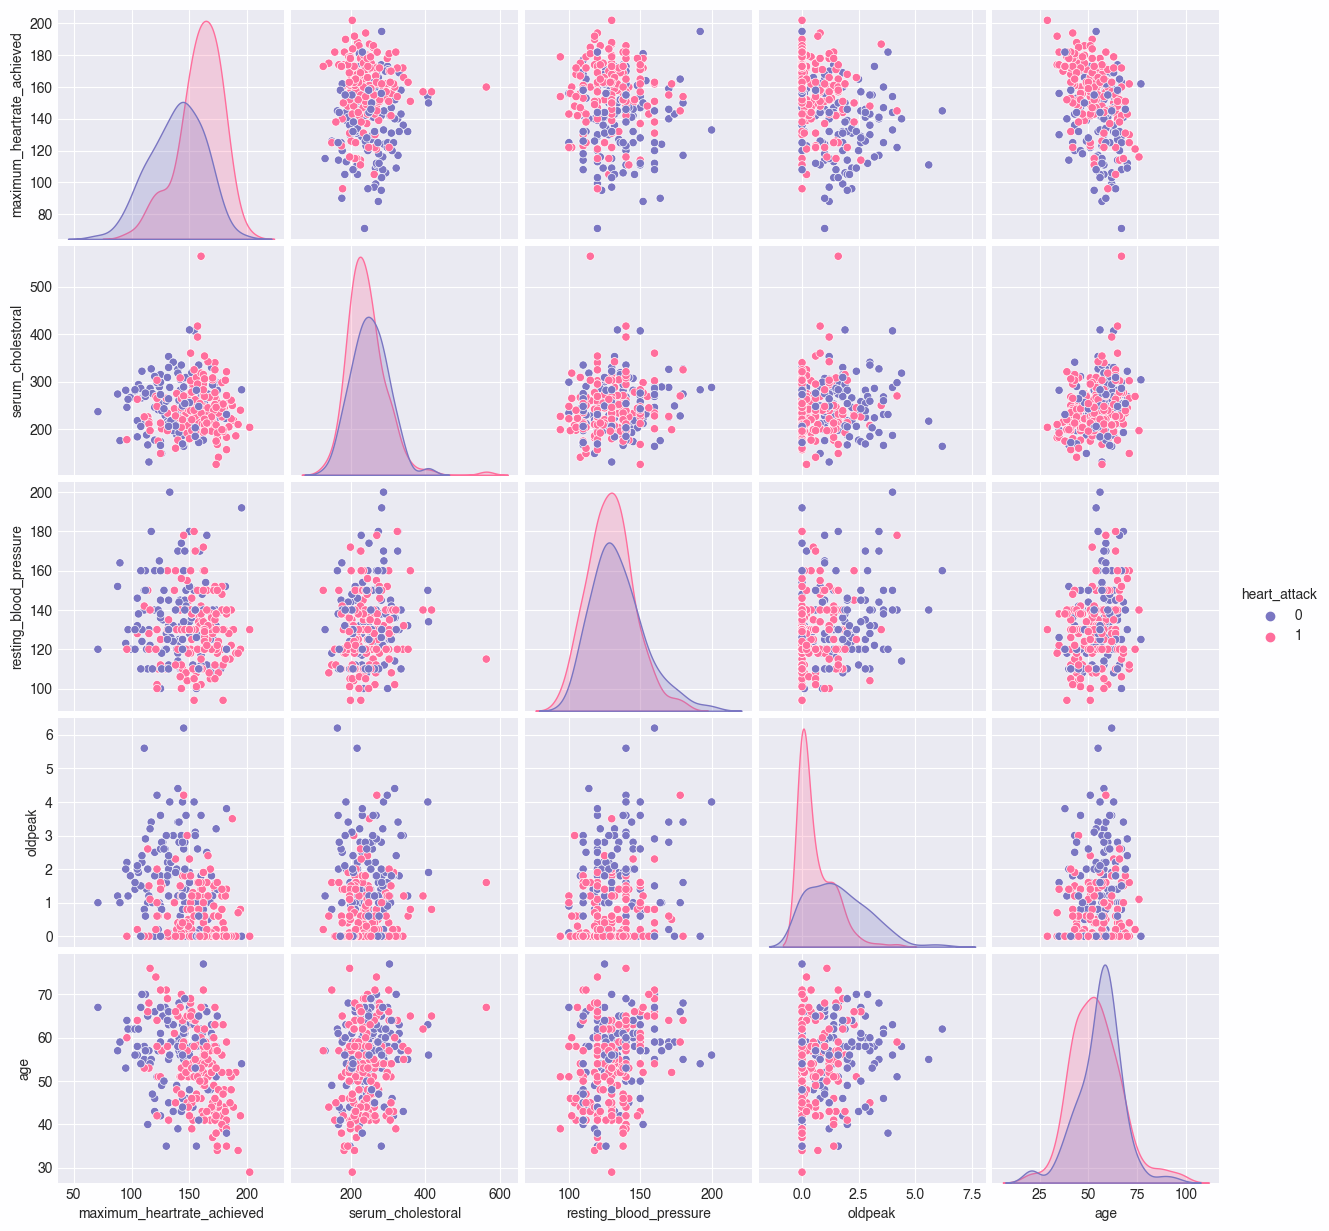

In [38]:
sns.pairplot(data=heart, vars=numerical_features, hue="heart_attack")

> We can see that most persons with a heart attack achieved a higher maximum heartrate and have a lower oldpeak (ST depression induced by exercise relative to rest)

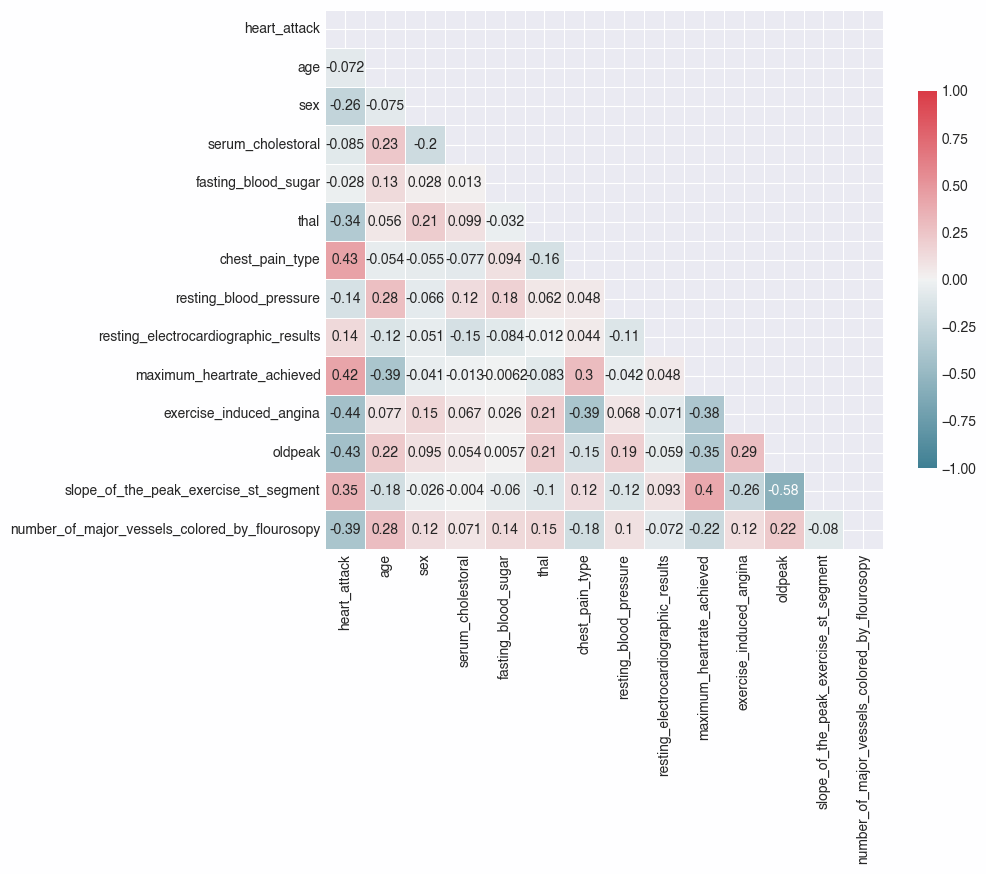

In [39]:
# Compute correlations
correlations = heart.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(9,7))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=1, vmin=-1, annot=True,
            linewidths=.5, cbar_kws={"shrink": .7});

> No other clear pattern or relationships.

# Train - Test - Split

We take our preprocessed data "heart_1".

In [40]:
y = heart_1["heart_attack"]
X = heart_1.drop(columns="heart_attack", axis=1)

In [41]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify=y)

# One-Hot-Encoding
We will one-hot-encode our categorical features because most of the classification models can handle one-hot-encoded categorical features better.

In [42]:
# First we initialize an instance of the sklearn one-hot-encoder
ohenc = OneHotEncoder(drop="first", handle_unknown="ignore")

In [43]:
# We define two functions to fit and transform our DataFrame with the one-hot-encoder.

def ohenc_fit_transform(df:pd.DataFrame, categorical_features:list, enc:OneHotEncoder)-> pd.DataFrame:
    df = df.reset_index().drop("index", axis=1)
    cat_encoded = enc.fit_transform(df[categorical_features])
    cat_encoded = cat_encoded.toarray()
    cat_encoded = pd.DataFrame(cat_encoded,columns=enc.get_feature_names_out())
    df_encoded = pd.concat([df,cat_encoded],axis=1) # append to original dataframe
    df_encoded.drop(categorical_features, axis=1, inplace=True)
    return df_encoded

def ohenc_transform(df:pd.DataFrame, categorical_features:list, enc:OneHotEncoder)-> pd.DataFrame:
    df = df.reset_index().drop("index", axis=1)
    cat_encoded = enc.transform(df[categorical_features])
    cat_encoded = cat_encoded.toarray()
    cat_encoded = pd.DataFrame(cat_encoded,columns=enc.get_feature_names_out())
    df_encoded = pd.concat([df,cat_encoded],axis=1) # append to original dataframe
    df_encoded.drop(categorical_features, axis=1, inplace=True)
    return df_encoded

In [44]:
categorical_features


['fasting_blood_sugar',
 'thal',
 'chest_pain_type',
 'resting_electrocardiographic_results',
 'exercise_induced_angina',
 'slope_of_the_peak_exercise_st_segment',
 'number_of_major_vessels_colored_by_flourosopy',
 'sex']

In [45]:
# Now we encode our categorical features
X_train_encoded = ohenc_fit_transform(X_train, categorical_features, ohenc)

In [46]:
X_train_encoded

,age,serum_cholestoral,resting_blood_pressure,maximum_heartrate_achieved,oldpeak,fasting_blood_sugar_1.0,thal_1.0,thal_2.0,thal_3.0,chest_pain_type_1.0,...,resting_electrocardiographic_results_1.0,resting_electrocardiographic_results_2.0,exercise_induced_angina_1.0,slope_of_the_peak_exercise_st_segment_1.0,slope_of_the_peak_exercise_st_segment_2.0,number_of_major_vessels_colored_by_flourosopy_1.0,number_of_major_vessels_colored_by_flourosopy_2.0,number_of_major_vessels_colored_by_flourosopy_3.0,number_of_major_vessels_colored_by_flourosopy_4.0,sex_1.0
0,51.0,213.0,125.0,125.0,1.4,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,63.0,330.0,130.0,132.0,1.8,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,71.0,265.0,110.0,130.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,67.0,564.0,115.0,160.0,1.6,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,67.0,277.0,152.0,172.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,66.0,302.0,120.0,151.0,0.4,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
229,46.0,249.0,120.0,144.0,0.8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
230,67.0,286.0,160.0,108.0,1.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
231,40.0,199.0,140.0,178.0,1.4,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [47]:
# After encoding with our train data, we have also to transform the test data 

X_test_encoded = ohenc_transform(X_test, categorical_features,ohenc)

In [48]:
X_test_encoded

,age,serum_cholestoral,resting_blood_pressure,maximum_heartrate_achieved,oldpeak,fasting_blood_sugar_1.0,thal_1.0,thal_2.0,thal_3.0,chest_pain_type_1.0,...,resting_electrocardiographic_results_1.0,resting_electrocardiographic_results_2.0,exercise_induced_angina_1.0,slope_of_the_peak_exercise_st_segment_1.0,slope_of_the_peak_exercise_st_segment_2.0,number_of_major_vessels_colored_by_flourosopy_1.0,number_of_major_vessels_colored_by_flourosopy_2.0,number_of_major_vessels_colored_by_flourosopy_3.0,number_of_major_vessels_colored_by_flourosopy_4.0,sex_1.0
0,56.0,236.0,120.0,178.0,0.8,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,57.0,276.0,150.0,112.0,0.6,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,58.0,284.0,120.0,160.0,1.8,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,49.0,271.0,134.0,162.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44.0,226.0,120.0,169.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,55.0,342.0,132.0,166.0,1.2,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,42.0,209.0,120.0,173.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,52.0,204.0,128.0,156.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,35.0,282.0,126.0,156.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,66.0,228.0,178.0,165.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Scaling


In [49]:
numerical_features

['maximum_heartrate_achieved',
 'serum_cholestoral',
 'resting_blood_pressure',
 'oldpeak',
 'age']

In [50]:
# Before we have a look at the different methods, 
# we have to define which columns we want to scale.
col_scale = ['maximum_heartrate_achieved', 'serum_cholestoral',
       'resting_blood_pressure', 'oldpeak', 'age']

In [51]:
# Scaling with MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded[col_scale])
X_test_scaled = scaler.transform(X_test_encoded[col_scale])

In [52]:
# Concatenating scaled and dummy columns 
X_train_preprocessed = np.concatenate([X_train_scaled, X_train_encoded.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed = np.concatenate([X_test_scaled, X_test_encoded.drop(col_scale, axis=1)], axis=1)

# Evaluation Metric

For this case it is important, that we catch all of the people with a heart disease.
Therefore we will use the **recall** as our evaluation metric.

# First Modelling

In [53]:
lr_1 = LogisticRegression(max_iter=10000)

lr_1.fit(X_train_preprocessed, y_train)
y_pred = lr_1.predict(X_test_preprocessed)

In [54]:
# We define a function to print the model scores

def print_scores(y_test, y_pred):
    results = confusion_matrix(y_test, y_pred) 
    print ('Confusion Matrix :')
    print((results) )
    print("----"*15)
    print ('Recall :',recall_score(y_test, y_pred))
    print("----"*15)
    print ('Report : ')
    print (classification_report(y_test, y_pred))

In [55]:
print_scores(y_test, y_pred)

Confusion Matrix :
[[19  8]
 [ 4 28]]
------------------------------------------------------------
Recall : 0.875
------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.78      0.88      0.82        32

    accuracy                           0.80        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.80      0.80      0.79        59



> The result of a recall score of 0.875 is not so bad for a first model without any further feature engineering and parameter tuning.  
> A recall of 0.875 means that we predicted 87.5 % of the actual heart attacks correctly as heart attack.

## Cross-Validation

### Scaled data

In [56]:
# Fit and evaluate model without hyperparameter tuning using cross validation and scaled data
scores_scaled = cross_val_score(lr_1, X_train_preprocessed, np.array(y_train), cv=5, n_jobs=-1, scoring="recall")

# Evaluation
print('Score (scaled):', round(scores_scaled.mean(), 4))

Score (scaled): 0.8834


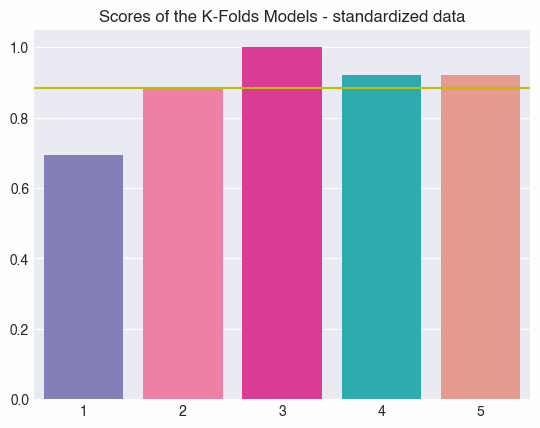

In [57]:
plt.axhline(y=scores_scaled.mean(), color='y', linestyle='-')
sns.barplot(x=[1,2,3,4, 5],y=scores_scaled).set_title('Scores of the K-Folds Models - standardized data');

### Unscaled Data

In [58]:
# Fit and evaluate model without hyperparameter tuning using cross validation and unscaled data 
scores = cross_val_score(lr_1, X_train_encoded, y_train, cv=5, n_jobs=-1, scoring="recall")

# Evaluation 
print('Score (unscaled):', round(scores.mean(), 4))

Score (unscaled): 0.8988


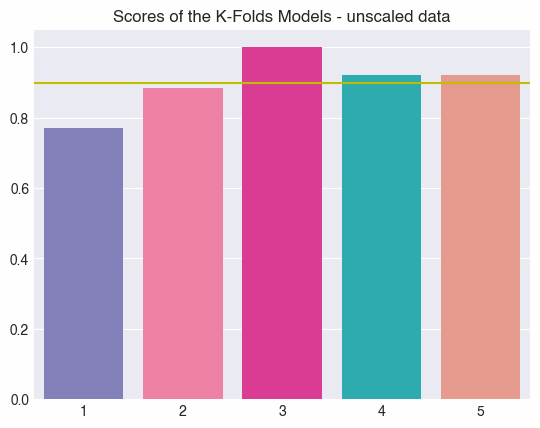

In [59]:
# plotting the scores and average score
plt.axhline(y=scores.mean(), color='y', linestyle='-')
sns.barplot(x=[1,2,3,4, 5],y=scores).set_title('Scores of the K-Folds Models - unscaled data');

> No difference in the performance of scaled and unscaled data.

# Hyperparameter Tuning

## Randomized Search

We first do a randomized search for the best hyperparameters.  
Therefore we define a parameter grid to choose the parameters of.

In [60]:
# First look at the parameters for the logistic regression model
lr_1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
# Define the parameter grid

param_grid_rs = {'C': np.arange(0, 6, 0.2),
            'l1_ratio': np.append(np.arange(0.1, 1, 0.1), None),  # errors for not elastic net
            'max_iter': [1000],
            'penalty': ['l1', 'l2', 'elasticnet', None],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
            }

In [62]:
# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(LogisticRegression(), param_grid_rs, scoring='recall',
                  cv=5, verbose=5, n_jobs=-1, n_iter=10)

# Fit randomized search object to data
rs.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END C=4.6000000000000005, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.885 total time=   0.0s
[CV 3/5] END C=4.6000000000000005, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.960 total time=   0.0s
[CV 1/5] END C=1.2000000000000002, l1_ratio=0.30000000000000004, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1.2000000000000002, l1_ratio=0.30000000000000004, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=4.6000000000000005, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.920 total time=   0.0s
[CV 3/5] END C=1.2000000000000002, l1_ratio=0.30000000000000004, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.2000000000000002, l1_ratio=0.30000000000000004, max_iter=1000, penalty=elasticnet, solver=sag;, score=nan total time= 

[CV 5/5] END C=0.4, l1_ratio=0.1, max_iter=1000, penalty=None, solver=newton-cholesky;, score=0.840 total time=   0.0s
[CV 3/5] END C=0.2, l1_ratio=0.6, max_iter=1000, penalty=l2, solver=newton-cg;, score=1.000 total time=   0.1s
[CV 4/5] END C=4.0, l1_ratio=None, max_iter=1000, penalty=l2, solver=liblinear;, score=0.920 total time=   0.0s
[CV 5/5] END C=5.6000000000000005, l1_ratio=0.7000000000000001, max_iter=1000, penalty=None, solver=lbfgs;, score=0.840 total time=   0.0s
[CV 2/5] END C=5.6000000000000005, l1_ratio=0.7000000000000001, max_iter=1000, penalty=None, solver=lbfgs;, score=0.846 total time=   0.0s
[CV 3/5] END C=5.6000000000000005, l1_ratio=0.7000000000000001, max_iter=1000, penalty=None, solver=lbfgs;, score=0.960 total time=   0.0s


/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/Users/sarahsp

[CV 5/5] END C=4.6000000000000005, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.840 total time=   0.0s
[CV 3/5] END C=3.2, l1_ratio=0.1, max_iter=1000, penalty=None, solver=newton-cg;, score=0.960 total time=   0.0s


/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=4.6000000000000005, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.846 total time=   0.0s


/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    es

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8]),
                                        'l1_ratio': array([0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001,
       0.8, 0.9, None], dtype=object),
                                        'max_iter': [1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='recall', verbose=5)

In [63]:
# Best score
print('Best score:', round(rs.best_score_, 3))

# Best parameters
print('Best parameters:', rs.best_params_)

Best score: 0.89
Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'l1_ratio': 0.5, 'C': 4.6000000000000005}


> The result of `0.89` recall score is a bit better then for the model with default parameters (`0.875`).

### Grid Search
Let's see if we can improve the result with a grid search.
Because of the result of the randomized search, we will exclude the elastic-net (and l1-ratio) from the parameter grid.

In [64]:
# Define the parameter grid

param_grid_gs = {'C': np.arange(0, 6, 0.2),
            'max_iter': [1000],
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
            }

In [65]:
# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(LogisticRegression(), param_grid_gs, scoring='recall',
                  cv=5, verbose=5, n_jobs=-1)

# Fit gridsearch object to data
gs.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END C=0.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, max_iter=1000, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, max_iter=1000, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, max_iter=1000, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, max_iter=1000, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/

/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
640 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sarahsponemann/neuefische/Machine_Learning/Hands-on-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/Use

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8]),
                         'max_iter': [1000], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='recall', verbose=5)

In [66]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: 0.899
Best parameters: {'C': 0.8, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


> We could improve the score a tiny more and have now a mean **recall of `0.899`** instead of `0.89`.

# Setup our Best Model

Now we take the classifier (parameters) from our grid search and set up our model.

In [67]:
# Assigning the fitted Logistic Regression model with best parameter combination to a new variable
lr_best = gs.best_estimator_

In [68]:
lr_best.get_params()

{'C': 0.8,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
lr_best.fit(X_train_preprocessed, y_train)

# Making predictions on the test set
y_pred_1 = lr_best.predict(X_test_preprocessed)

In [70]:
print_scores(y_test, y_pred)

Confusion Matrix :
[[19  8]
 [ 4 28]]
------------------------------------------------------------
Recall : 0.875
------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.78      0.88      0.82        32

    accuracy                           0.80        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.80      0.80      0.79        59



> In the end we have the same model performance for our test data.  
> **Recall Score: 0.875**

## Threshold

We try to improve our recall score by setting the threshold down to 0.3.  
That means instances that have a predicted probability of 0.3 or higher to be true are predicted as true -> heart attack.

In [71]:
prob = lr_best.predict_proba(X_test_preprocessed)

y_pred_2 = np.where(prob[:, 1] >= 0.3, 1, 0)

In [72]:
print_scores(y_test, y_pred_2)

Confusion Matrix :
[[14 13]
 [ 2 30]]
------------------------------------------------------------
Recall : 0.9375
------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.88      0.52      0.65        27
           1       0.70      0.94      0.80        32

    accuracy                           0.75        59
   macro avg       0.79      0.73      0.73        59
weighted avg       0.78      0.75      0.73        59



> With a lower threshold we have higher recall (0.875 -> 0.938) but lost precision (0.78 -> 0.7)

# Future work

- replacing more missing values
- feature engineering
- try KNN or other models
- look for over-fitting
